In [1]:
using FFTW
using DSP  # Import DSP for hanning function
using Plots

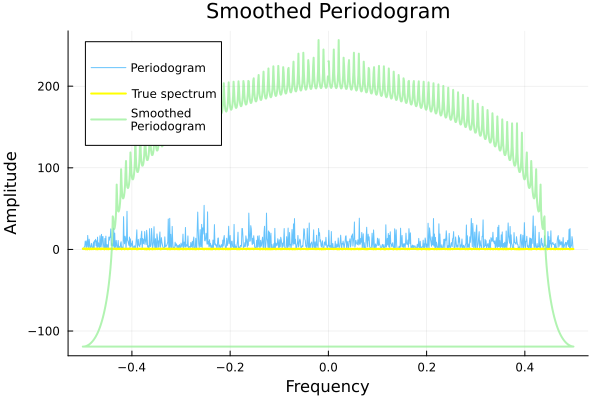

In [2]:

N = 1000  # Replace with your actual data size
L = 100
h = fftshift(hanning(L))  # Use hanning function from DSP package
z = zeros(N)
z[1:div(L, 2)] .= h[1:div(L, 2)]
z[end:-1:end-div(L, 2)] .= h[end:-1:end-div(L, 2)]

Ry = fft(z)
f = fftfreq(N)
Py_smoothed = fft(z .* Ry)

# Assuming Py, Sy are defined and populated
Py = rand(N)  # Replace with your actual data
Sy = rand(N)  # Replace with your actual data

p1 = plot(f, - 20 * log10.(fftshift(Py))
    , alpha=0.6, label="Periodogram"
    , xlabel = "Frequency", ylabel = "Amplitude"
    , title = "Smoothed Periodogram"
)
p1 = plot!(f, fftshift(Sy)
    , lw=2, color="yellow", label="True spectrum"
)
p1 = plot!(
    f,
    - 20 * log10.(abs2.(fftshift(Py_smoothed))),
    alpha=0.7,
    color="lightgreen",
    lw=2,
    label="Smoothed \nPeriodogram"
)
display(p1)
